# ニューラルネットワーク

### ニューラルネットワークモデル

多層パーセプトロン(MLP)は線形モデルを一般化し，決定までに複数のステージで計算するものと考えられる．

線形回帰では予測を次の式で行う

$$\hat{y} = w[0] \times x[0] +\cdots+ w[p] \times x[p] + b$$

図示すると以下のようになる

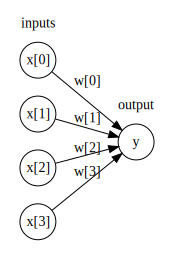

In [1]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline
mglearn.plots.plot_logistic_regression_graph()

MLPでは重み付きの和の計算が繰り返し行われる．まず中間ステップを表す`隠れユニット`の計算で重み付き和が行われ，次に，この隠れユニットの値に対して重み付き和が行われて最後の結果が算出される

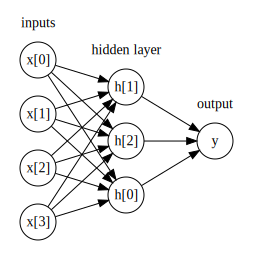

In [2]:
mglearn.plots.plot_single_hidden_layer_graph()

全てｂの入力ノードと全ての隠れユニットの間に重みが一つづつあり，全ての隠れ層のユニットと出力ノードの間にも一つづつある．個々の隠れユニットの重み付き和を計算したら，その結果に対して非線形関数を適用する．

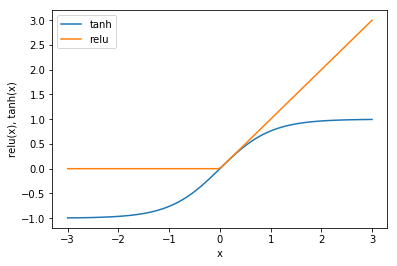

In [3]:
import numpy as np

line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")
plt.show()

小さいニューラルネットワークで回帰を行う場合の$\hat{y}$を計算する式は以下のようになる．

$$h[0] = tanh(w[0,0] \times x[0] + w[1,0] \times x[1] + w[2,0] \times x[2] + w[3,0] \times x[3] + b[0])$$
$$h[1] = tanh(w[0,1] \times x[0] + w[1,0] \times x[1] + w[2,1] \times x[2] + w[3,1] \times x[3] + b[1])$$
$$h[0] = tanh(w[0,2] \times x[0] + w[1,0] \times x[1] + w[2,2] \times x[2] + w[3,2] \times x[3] + b[2])$$

$$\hat{y} = v[0] \times h[0] + v[1] \times h[1] + v[2] \times h[2] + b$$


隠れ層の追加も可能

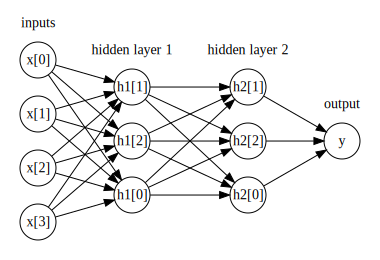

In [4]:
mglearn.plots.plot_two_hidden_layer_graph()

## ニューラルネットワークのチューニング

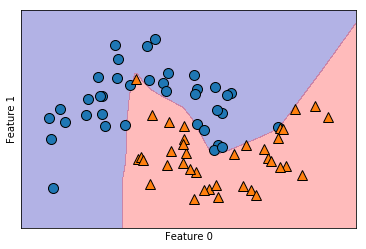

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.cross_validation import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

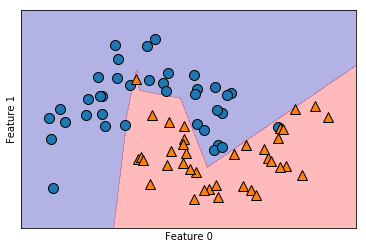

In [8]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]) #隠れ層を変えてる
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

決定境界を滑らかにする方法は

- 隠れ層のユニット数を増やす
- 隠れ層を増やす
- 非線形活性化関数にデフォルトのreluではなくtanhを用いる

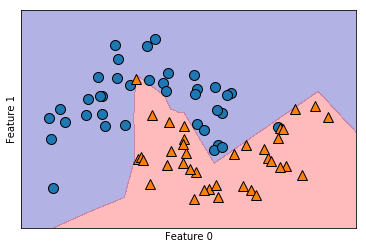

In [9]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

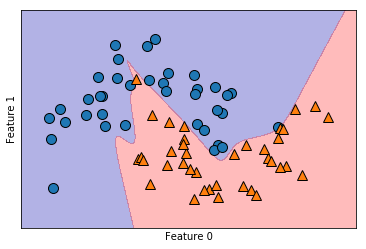

In [10]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

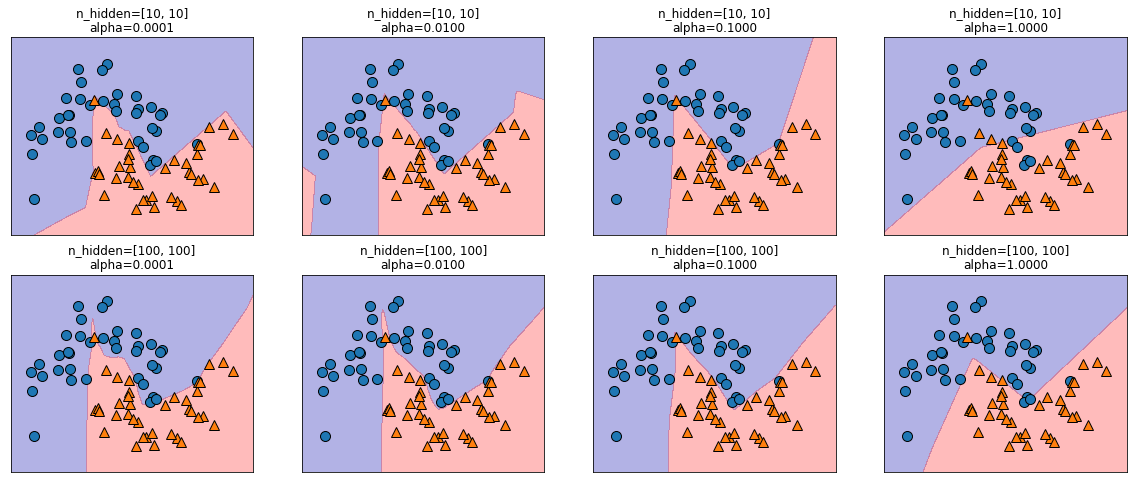

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))
plt.show()

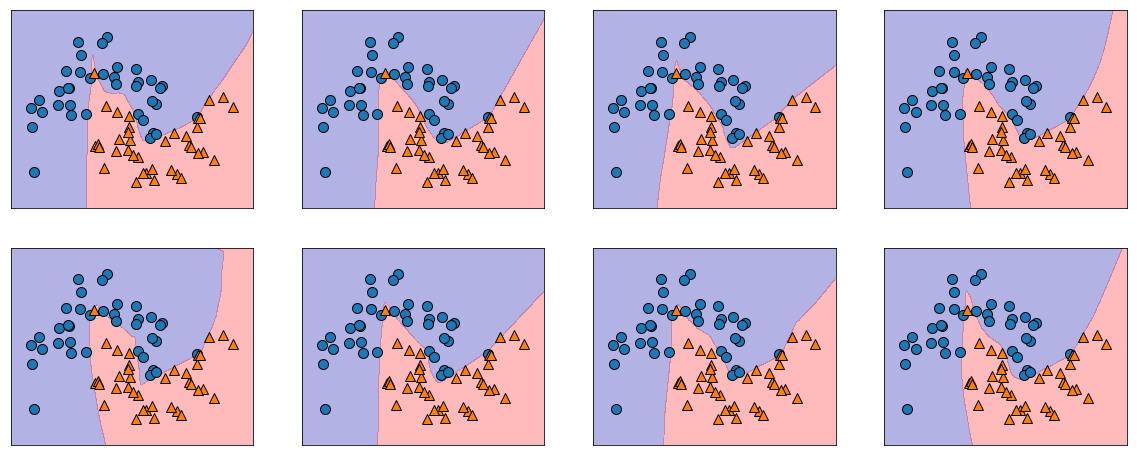

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
plt.show()

In [13]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   3.45400000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.74400000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   7.89500000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.22600000e-01   1.05800000e+00   1.25200000e+00   2.91000000e-01
   6.63800000e-01   2.07500000e-01]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.91
Accuracy on test set: 0.88


正規化するとさらに精度は良くなる。

In [15]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


/Users/user/.pyenv/versions/miniconda3-3.10.1/envs/py35/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [16]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.972


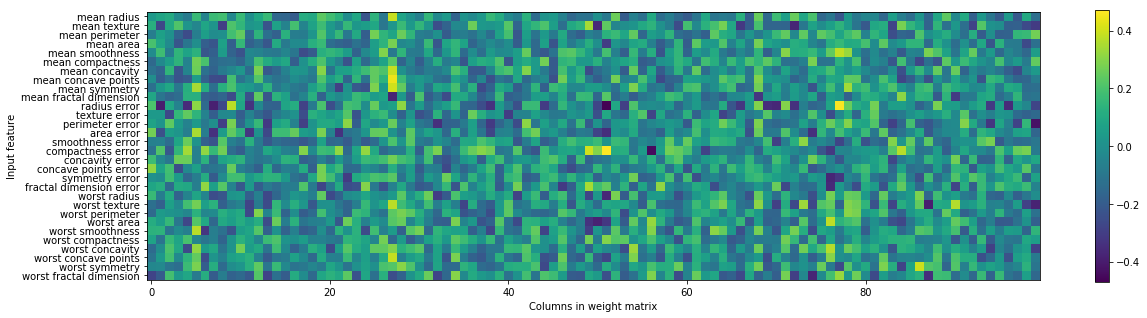

In [17]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()
plt.show()

入力と第１層を繋いでる重みのヒートマップ。３０の入力特徴量を可視化。列は１００の隠れユニット。明るい色が大きな正の値。    
１つの推論はすべての隠れユニットに対して重みが小さい特徴量は重要ではない。mean smoothness, mean compactness, smoothness error, fractal dimension errorは重みが小さい。この特徴量は重要でないか、特徴量をニューラルネットで使える様に表現できてないかどちらか。

### 長所，短所，パラメータ

- 長所
    - 複雑なモデルを構築出来る
- 短所
    - 時間がかかる
    - 慎重な前処理が必要
- パラメータ
    - 隠れ層の数
    - 層あたりの隠れユニットの数